In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

Step 1 - DATA CLEANING AND IMPUTING 

In [86]:
data = pd.read_csv('BreastCancer_Prognostic_v1.csv')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         198 non-null    float64
 1   Outcome                    198 non-null    object 
 2   Time                       198 non-null    float64
 3   radius_mean                198 non-null    float64
 4   texture_mean               198 non-null    float64
 5   perimeter_mean             198 non-null    float64
 6   area_mean                  198 non-null    float64
 7   smoothness_mean            198 non-null    float64
 8   compactness_mean           198 non-null    float64
 9   concavity_mean             198 non-null    float64
 10  concave_points_mean        198 non-null    float64
 11  symmetry_mean              198 non-null    float64
 12  fractal_dimension_mean     198 non-null    float64
 13  radius_std_dev             198 non-null    float64

In [87]:
data = data[:198]

In [14]:
#data.decribe()
#data.head()

In [17]:
data['Lymph_Node_Status'].value_counts()    #Median is 0

0     87
1     35
2     17
4     10
13     6
7      6
9      4
3      4
?      4
15     3
6      3
11     3
27     2
5      2
8      2
10     2
20     2
14     1
16     1
17     1
18     1
24     1
21     1
Name: Lymph_Node_Status, dtype: int64

In [18]:
data[data['Lymph_Node_Status'].astype(str) == '?']

ID Outcome  Time  radius_mean  texture_mean  perimeter_mean  \
6    844359.0       N  60.0        18.98         19.61          124.40   
28   854253.0       N  12.0        16.74         21.59          110.10   
85   877500.0       N  72.0        14.45         20.22           94.49   
196  947204.0       R   3.0        21.42         22.84          145.00   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  ...  \
6       1112.0          0.09087            0.1237          0.1213  ...   
28       869.5          0.09610            0.1336          0.1348  ...   
85       642.7          0.09872            0.1206          0.1180  ...   
196     1440.0          0.10700            0.1939          0.2380  ...   

     Worst_perimeter  Worst_area  Worst_smoothness  Worst_compactness  \
6              152.6      1593.0            0.1144             0.3371   
28             133.5      1229.0            0.1563             0.3835   
85             117.9      1044.0            0.1552             0.4056   
196            198.3      2375.0            0.1498             0.4379   

     Worst_concavity  Worst_concave_points  Worst_symmetry  \
6             0.2990                0.1922          0.2726   
28            0.5409                0.1813          0.4863   
85            0.4967                0.1838          0.4753   
196           0.5411                0.2215          0.2832   

     Worst_fractal_dimension  Tumor_Size  Lymph_Node_Status  
6                    0.09581         1.5                  ?  
28                   0.08633         1.5                  ?  
85                   0.10130         1.5                  ?  
196                  0.08981         3.0                  ?  

[4 rows x 35 columns]

In [19]:
# Imputing the median where there are missing values
data.loc[6,'Lymph_Node_Status'] = '0'
data.loc[28,'Lymph_Node_Status'] = '0'
data.loc[85,'Lymph_Node_Status'] = '0'
data.loc[196,'Lymph_Node_Status'] = '0'

In [20]:
# To convert from object to integer
data['Lymph_Node_Status'] = data['Lymph_Node_Status'].astype(int) 

In [22]:
#data.drop('ID',inplace=True,axis=1)

Step 2 - VISUALIZING DATA

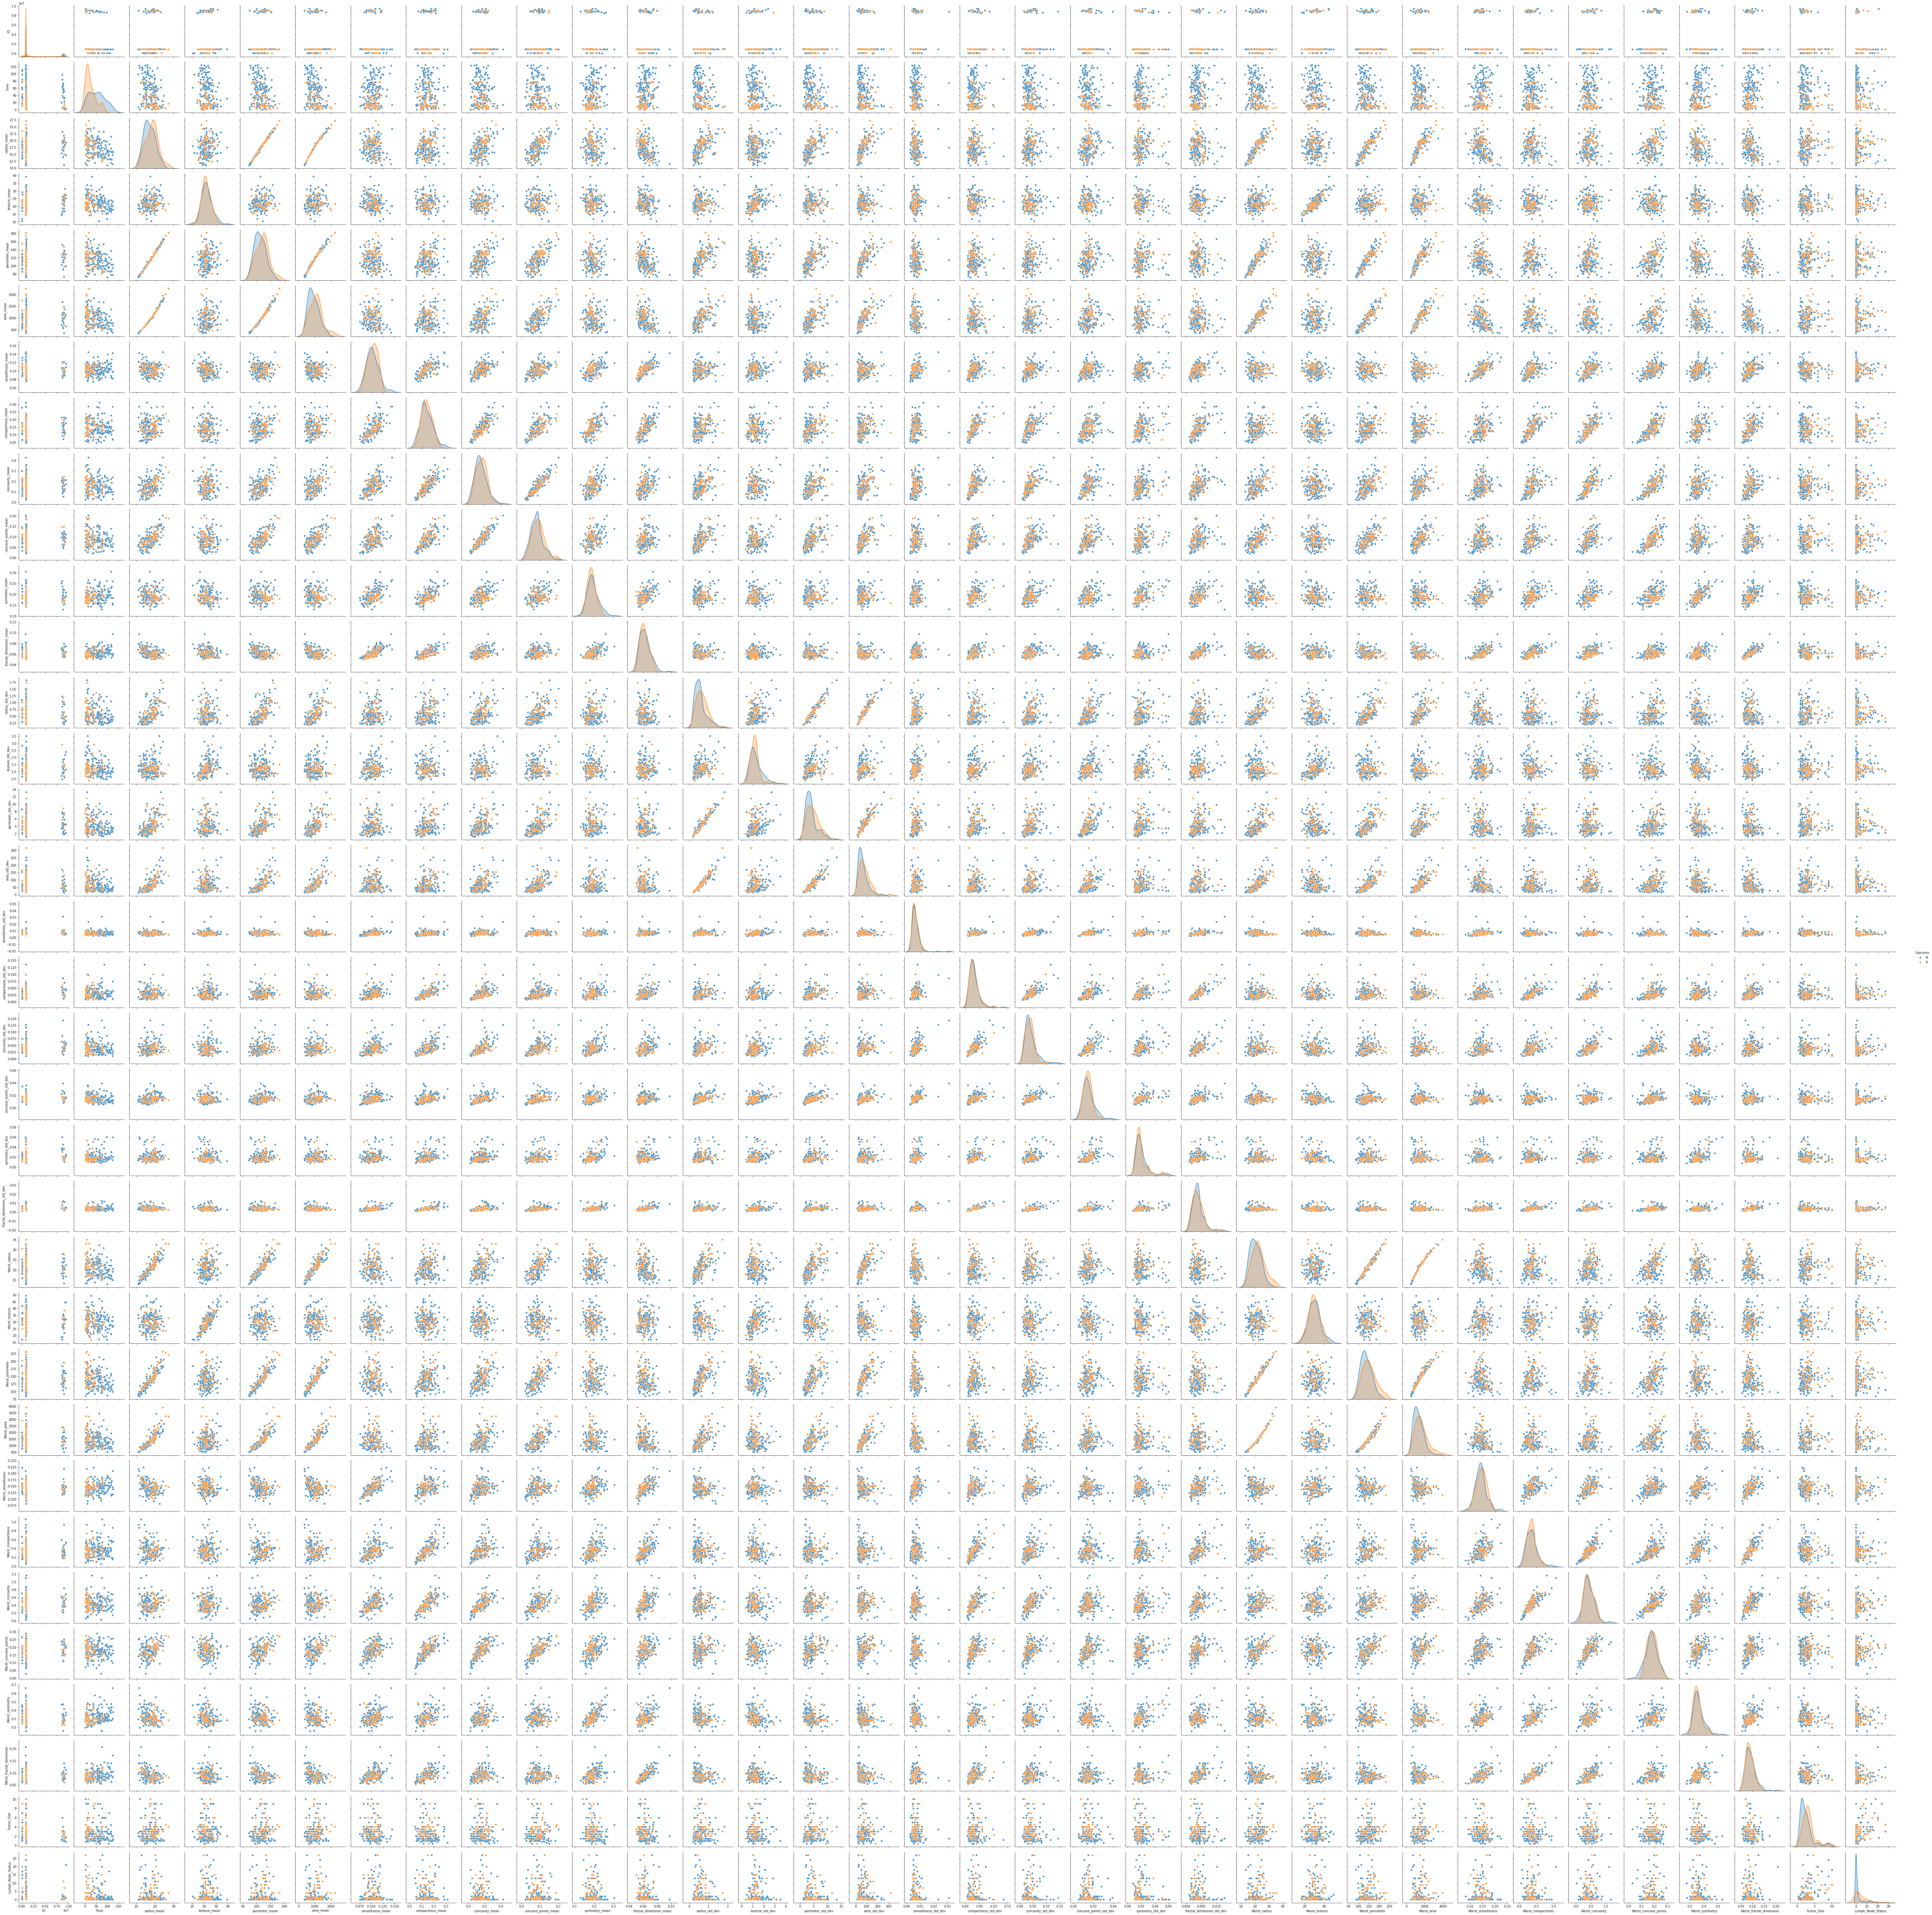

In [21]:
sns.pairplot(data,hue='Outcome')

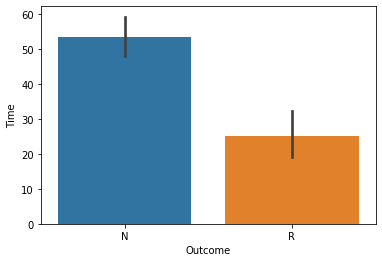

In [24]:
sns.barplot(x=data['Outcome'],y=data['Time'])
# Time can be a major feature to help us diferentiate between R and N

In [25]:
# Now we will create 2 datasets, one for linear models and one for tree-based models
data_linear = data

In [27]:
data_linear.columns

Index(['Outcome', 'Time', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_std_dev', 'texture_std_dev', 'perimeter_std_dev',
       'area_std_dev', 'smoothness_std_dev', 'compactness_std_dev',
       'concavity_std_dev', 'concave_points_std_dev', 'symmetry_std_dev',
       'fractal_dimension_std_dev', 'Worst_radius', 'Worst_texture',
       'Worst_perimeter', 'Worst_area', 'Worst_smoothness',
       'Worst_compactness', 'Worst_concavity', 'Worst_concave_points',
       'Worst_symmetry', 'Worst_fractal_dimension', 'Tumor_Size',
       'Lymph_Node_Status'],
      dtype='object')

In [32]:
scalar = StandardScaler()
scalar.fit(data_linear.drop(['Outcome','Tumor_Size','Lymph_Node_Status'],axis=1))
scaled_features = scalar.transform(data_linear.drop(['Outcome','Tumor_Size','Lymph_Node_Status'],axis=1))
df_features = pd.DataFrame(scaled_features,columns=data_linear.drop(['Outcome','Tumor_Size','Lymph_Node_Status'],axis=1).columns)


In [33]:
df_features

Time  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   -0.457658     0.192688      1.241770        0.123934   0.122300   
1    0.415051     0.183175     -2.774630        0.372418   0.088138   
2    2.015017     1.254939     -1.127953        1.061610   1.147186   
3    2.218649    -1.900104     -0.442226       -1.747667  -1.662423   
4   -0.574019     0.912482     -1.850998        0.949089   0.930821   
..        ...          ...           ...             ...        ...   
193 -1.068554     1.619592     -0.083036        1.502318   1.784892   
194 -1.126734    -0.625403      2.076770       -0.649648  -0.653766   
195 -1.010373    -0.076838      1.612622       -0.227694  -0.155842   
196 -1.272186     1.270793      0.131545        1.413238   1.337928   
197 -1.184915    -0.225870      1.365387       -0.213629  -0.240965   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          -0.623774         -0.784542       -0.676803            -0.480176   
1           1.258416          2.711439        2.043606             1.785222   
2          -1.146560         -0.477137       -0.436726            -0.147247   
3           3.187841          2.838018        1.209726             0.545246   
4          -0.190654         -0.197860        0.593194             0.518612   
..               ...               ...             ...                  ...   
193        -2.142495         -1.025242       -1.244751            -0.683780   
194        -0.695827         -0.732303       -0.266256            -0.644421   
195        -1.053691         -1.528945       -1.284385            -1.068203   
196         0.345742          1.029752        1.161426             1.332438   
197        -1.098524         -0.593669       -0.781926            -1.091582   

     symmetry_mean  ...  Worst_radius  Worst_texture  Worst_perimeter  \
0        -0.228521  ...      0.143701       1.156324        -0.022477   
1         1.795777  ...      1.029751      -2.133937         1.535510   
2         1.481536  ...      0.916336      -1.525864         0.650684   
3         2.446183  ...     -1.444100      -0.606256        -1.439240   
4        -0.433143  ...      0.358716      -2.243890         0.411261   
..             ...  ...           ...            ...              ...   
193      -0.729114  ...      0.861992      -0.887803         0.754782   
194      -0.703536  ...     -0.869940       1.889345        -0.962822   
195      -0.491606  ...     -0.061862       1.086354        -0.272310   
196      -0.159095  ...      1.729139      -0.359695         2.010887   
197      -0.137171  ...     -0.302868       0.796478        -0.400697   

     Worst_area  Worst_smoothness  Worst_compactness  Worst_concavity  \
0      0.053105         -1.112648          -1.054732        -0.708404   
1      1.050496          0.832831           1.837343         1.589132   
2      0.930741         -1.144541          -0.123520        -0.550192   
3     -1.432374          3.001561           3.064487         1.444778   
4      0.290905         -0.297096          -0.978914        -0.211827   
..          ...               ...                ...              ...   
193    0.850333         -2.825307          -1.425871        -1.911738   
194   -0.814265         -0.761824          -0.788147        -0.803677   
195   -0.188116         -0.811941          -1.271179        -1.285242   
196    1.659537          0.267867           0.445112         0.602907   
197   -0.328401         -0.497567          -0.515448        -0.526518   

     Worst_concave_points  Worst_symmetry  Worst_fractal_dimension  
0               -1.370815       -0.743009                -0.459226  
1                1.922113        1.823321                 1.329259  
2                0.541923        1.467183                -0.007488  
3                1.746815        4.540377                 3.891002  
4               -0.361191       -1.160505                -0.665207  
..                    ...             .

In [34]:
data_linear = pd.concat([df_features,data_linear['Tumor_Size'],data_linear['Lymph_Node_Status']],axis=1)

In [35]:
data_linear

Time  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   -0.457658     0.192688      1.241770        0.123934   0.122300   
1    0.415051     0.183175     -2.774630        0.372418   0.088138   
2    2.015017     1.254939     -1.127953        1.061610   1.147186   
3    2.218649    -1.900104     -0.442226       -1.747667  -1.662423   
4   -0.574019     0.912482     -1.850998        0.949089   0.930821   
..        ...          ...           ...             ...        ...   
193 -1.068554     1.619592     -0.083036        1.502318   1.784892   
194 -1.126734    -0.625403      2.076770       -0.649648  -0.653766   
195 -1.010373    -0.076838      1.612622       -0.227694  -0.155842   
196 -1.272186     1.270793      0.131545        1.413238   1.337928   
197 -1.184915    -0.225870      1.365387       -0.213629  -0.240965   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          -0.623774         -0.784542       -0.676803            -0.480176   
1           1.258416          2.711439        2.043606             1.785222   
2          -1.146560         -0.477137       -0.436726            -0.147247   
3           3.187841          2.838018        1.209726             0.545246   
4          -0.190654         -0.197860        0.593194             0.518612   
..               ...               ...             ...                  ...   
193        -2.142495         -1.025242       -1.244751            -0.683780   
194        -0.695827         -0.732303       -0.266256            -0.644421   
195        -1.053691         -1.528945       -1.284385            -1.068203   
196         0.345742          1.029752        1.161426             1.332438   
197        -1.098524         -0.593669       -0.781926            -1.091582   

     symmetry_mean  ...  Worst_perimeter  Worst_area  Worst_smoothness  \
0        -0.228521  ...        -0.022477    0.053105         -1.112648   
1         1.795777  ...         1.535510    1.050496          0.832831   
2         1.481536  ...         0.650684    0.930741         -1.144541   
3         2.446183  ...        -1.439240   -1.432374          3.001561   
4        -0.433143  ...         0.411261    0.290905         -0.297096   
..             ...  ...              ...         ...               ...   
193      -0.729114  ...         0.754782    0.850333         -2.825307   
194      -0.703536  ...        -0.962822   -0.814265         -0.761824   
195      -0.491606  ...        -0.272310   -0.188116         -0.811941   
196      -0.159095  ...         2.010887    1.659537          0.267867   
197      -0.137171  ...        -0.400697   -0.328401         -0.497567   

     Worst_compactness  Worst_concavity  Worst_concave_points  Worst_symmetry  \
0            -1.054732        -0.708404             -1.370815       -0.743009   
1             1.837343         1.589132              1.922113        1.823321   
2            -0.123520        -0.550192              0.541923        1.467183   
3             3.064487         1.444778              1.746815        4.540377   
4            -0.978914        -0.211827             -0.361191       -1.160505   
..                 ...              ...                   ...             ...   
193          -1.425871        -1.911738             -1.886056       -1.564662   
194          -0.788147        -0.803677             -1.113416       -0.426886   
195          -1.271179        -1.285242             -1.854547        0.170679   
196           0.445112         0.602907              0.947992       -0.536262   
197          -0.515448        -0.526518             -1.044629       -0.265490   

     Worst_fractal_dimension  Tumor_Size  Lymph_Node_Status  
0                  -0.459226         5.0                  5  
1                   1.329259         3.0                  2  
2                  -0.007488         2.5                  0  
3                   3.891002         2.0                  0  
4                  -0.665207       

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data_linear,data['Outcome'], test_size=0.20, random_state=101)

Feature: Time, Score: 0.07667
Feature: radius_mean, Score: 0.02216
Feature: texture_mean, Score: 0.03056
Feature: perimeter_mean, Score: 0.02140
Feature: area_mean, Score: 0.02630
Feature: smoothness_mean, Score: 0.03519
Feature: compactness_mean, Score: 0.02620
Feature: concavity_mean, Score: 0.02219
Feature: concave_points_mean, Score: 0.02560
Feature: symmetry_mean, Score: 0.02581
Feature: fractal_dimension_mean, Score: 0.04015
Feature: radius_std_dev, Score: 0.02913
Feature: texture_std_dev, Score: 0.04896
Feature: perimeter_std_dev, Score: 0.02982
Feature: area_std_dev, Score: 0.02459
Feature: smoothness_std_dev, Score: 0.02340
Feature: compactness_std_dev, Score: 0.02223
Feature: concavity_std_dev, Score: 0.02215
Feature: concave_points_std_dev, Score: 0.03543
Feature: symmetry_std_dev, Score: 0.03206
Feature: fractal_dimension_std_dev, Score: 0.02524
Feature: Worst_radius, Score: 0.03682
Feature: Worst_texture, Score: 0.03121
Feature: Worst_perimeter, Score: 0.02852
Feature: Wor

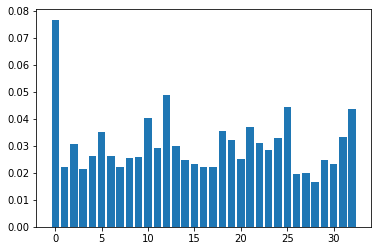

[[30  0]
 [ 8  2]]
0.8
              precision    recall  f1-score   support

           N       0.79      1.00      0.88        30
           R       1.00      0.20      0.33        10

    accuracy                           0.80        40
   macro avg       0.89      0.60      0.61        40
weighted avg       0.84      0.80      0.75        40



In [41]:
# Random forest classifier to fit basic model and find importance of each feature
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

In [42]:
# Accuracy is 0.8 and false negatives are 8. Also, time seems to be the most important of all features.Therefore split it so
# it is learnt well by the model
data_linear['Time_0to2yrs'] = 0
data_linear['Time_2to5yrs'] = 0
data_linear['Time_above5'] = 0
for i in range(198):
    if(data.loc[i,'Time'] <= 24):
        data_linear.loc[i,'Time_0to2yrs'] = 1
    elif((24 < data.loc[i,'Time']) & (data.loc[i,'Time']<= 60)):
        data_linear.loc[i,'Time_2to5yrs'] = 1
    else:
        data_linear.loc[i,'Time_above5'] = 1


In [46]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_linear,data['Outcome'], test_size=0.20, random_state=101)
rfc2 = RandomForestClassifier()
rfc2.fit(X_train2,y_train2)
y_pred2 = rfc2.predict(X_test2)
print(confusion_matrix(y_test2, y_pred2))
print(accuracy_score(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[30  0]
 [ 8  2]]
0.8
              precision    recall  f1-score   support

           N       0.79      1.00      0.88        30
           R       1.00      0.20      0.33        10

    accuracy                           0.80        40
   macro avg       0.89      0.60      0.61        40
weighted avg       0.84      0.80      0.75        40



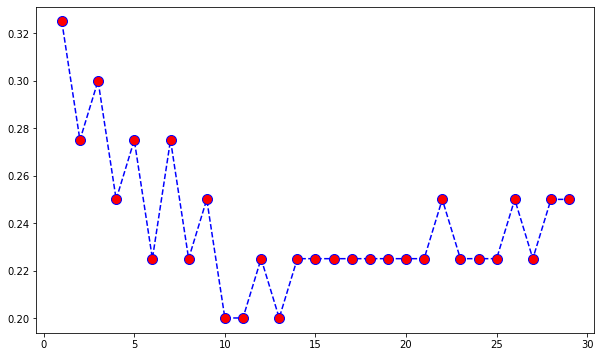

In [85]:
#The model does not improve. Use other methods like KNN, SVC, Logistic Regression
#KNN with elbow method to find optimal k
error_rate = []
fneg = []
accuracy = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train2,y_train2)
    pred_i = knn.predict(X_test2)
    error_rate.append(np.mean(pred_i != y_test2))
    cm = confusion_matrix(y_test2, pred_i)
    tn, fp, fn, tp = cm.ravel()
    fneg.append(fn)
    accuracy.append(accuracy_score(y_test2, pred_i))
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

In [48]:
knn_dummy = KNeighborsClassifier(n_neighbors=10)
knn_dummy.fit(X_train2,y_train2)
pred = knn_dummy.predict(X_test2)
error_rate.append(np.mean(pred != y_test2))
cm = confusion_matrix(y_test2, pred)
print(cm)
print(accuracy_score(y_test2, pred))
print(classification_report(y_test2, pred))

[[30  0]
 [ 8  2]]
0.8
              precision    recall  f1-score   support

           N       0.79      1.00      0.88        30
           R       1.00      0.20      0.33        10

    accuracy                           0.80        40
   macro avg       0.89      0.60      0.61        40
weighted avg       0.84      0.80      0.75        40



In [56]:
#Use grid search to find best c and gamma for SVC
param_grid = {'C': [0.1,1,10,100,1000],
              'gamma' : [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.781, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.774, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.774, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.781, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.750, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.774, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.774, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.781, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.750, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.750, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.774, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[CV] ................. C=100, gamma=0.0001, score=0.774, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.774, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.781, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.750, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.750, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.774, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.774, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.2s finished


In [61]:
svc = SVC(C=10,gamma=0.01)
svc.fit(X_train2,y_train2)
svc_pred = svc.predict(X_test2)
print(confusion_matrix(y_test2, svc_pred))
print(accuracy_score(y_test2, svc_pred))
print(classification_report(y_test2, svc_pred))

[[26  4]
 [ 7  3]]
0.725
              precision    recall  f1-score   support

           N       0.79      0.87      0.83        30
           R       0.43      0.30      0.35        10

    accuracy                           0.73        40
   macro avg       0.61      0.58      0.59        40
weighted avg       0.70      0.72      0.71        40



In [62]:
lr = LogisticRegression()
lr.fit(X_train2,y_train2)
lr_pred = lr.predict(X_test2)
print(confusion_matrix(y_test2, lr_pred))
print(accuracy_score(y_test2, lr_pred))
print(classification_report(y_test2, lr_pred))

[[28  2]
 [ 5  5]]
0.825
              precision    recall  f1-score   support

           N       0.85      0.93      0.89        30
           R       0.71      0.50      0.59        10

    accuracy                           0.82        40
   macro avg       0.78      0.72      0.74        40
weighted avg       0.81      0.82      0.81        40



In [63]:
#The accuracy increases with Logistic Regression as well as False-negatives = 5

In [65]:
xgb = XGBClassifier(booster='gblinear')
xgb.fit(X_train2,y_train2)
xgb_pred = xgb.predict(X_test2)
print(confusion_matrix(y_test2, xgb_pred))
print(accuracy_score(y_test2, xgb_pred))
print(classification_report(y_test2, xgb_pred))

[[28  2]
 [ 4  6]]
0.85
              precision    recall  f1-score   support

           N       0.88      0.93      0.90        30
           R       0.75      0.60      0.67        10

    accuracy                           0.85        40
   macro avg       0.81      0.77      0.78        40
weighted avg       0.84      0.85      0.84        40



In [66]:
#The accuracy increases with xgboost as well as False-negatives decrease to 4

In [67]:
#Add one more division of time
data_linear['Time_divide'] = 0
for i in range(198):
    if(data.loc[i,'Time'] <= 50):
        data_linear.loc[i,'Time_divide'] = 1
    else:
        data_linear.loc[i,'Time_divide'] = 0
        

In [94]:
#data_linear

In [77]:
final_X = data_linear.drop(['Lymph_Node_Status'],axis=1)
final_y = data['Outcome']

In [78]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(final_X,final_y, test_size=0.20, random_state=101)
xgb2 = XGBClassifier(booster='gblinear',verbosity=0)
xgb2.fit(X_train3,y_train3)
xgb2_pred = xgb2.predict(X_test3)
print(confusion_matrix(y_test3, xgb2_pred))
print(accuracy_score(y_test3, xgb2_pred))
print(classification_report(y_test3, xgb2_pred))

xgb2_pred = xgb2.predict(X_train3)
print(accuracy_score(y_train3, xgb2_pred))

[[28  2]
 [ 3  7]]
0.875
              precision    recall  f1-score   support

           N       0.90      0.93      0.92        30
           R       0.78      0.70      0.74        10

    accuracy                           0.88        40
   macro avg       0.84      0.82      0.83        40
weighted avg       0.87      0.88      0.87        40

0.8670886075949367


Finally gradient boosted decision trees gave the best model

train accuracy : 86.71%

cross-validation accuracy : 87.5%

In [96]:
final_model = XGBClassifier(booster='gblinear',verbosity=0)
final_model.fit(final_X,final_y)
final_pred = final_model.predict(final_X)
print(accuracy_score(final_y, final_pred))
print(confusion_matrix(final_y, final_pred))

0.8888888888888888
[[145   6]
 [ 16  31]]


In [93]:
final_sub = pd.DataFrame(data=zip(data['ID'],final_pred),columns=['ID','Prediction'])
final_sub.to_csv('question_a.csv',index=False)